# Урок 3. Логистическая регрессия

Небольшой шаг назад...

Линейная регрессия
![img/lr.png](img/lr.png)

- Предсказываем значение у, которые могут принимать любые значения из R
- Предсказываем через линейную комбинацию $$\vec y = X \vec w$$
- Находим оптимальные W с помощью градиентного спуска
- Функция потерь (MSE): $$L(x, y, w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \vec{w}^T \vec{x}_i)^2$$

Как же предсказать значения у == 0/1 ?

-

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0], X[:,1], c=y);

Функция потерь:  
$$L(𝑎,𝑋)=\frac{1}{l}\sum_{i=1}^n[𝑀𝑖<0]$$  
штрафуем за кол-во ошибок

In [3]:
def loss_func(x):
    return 0 if x > 0 else 1

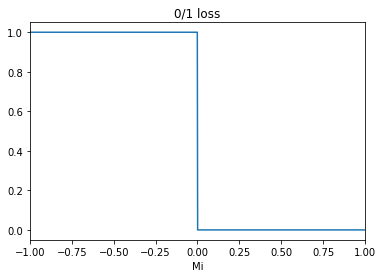

In [4]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.title('0/1 loss')
plt.plot(dots, zero_one_loss);

Логлосс:
- при у = {0;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = −\frac{1}{l}\sum_{i=1}^n(y_𝑖ln(a(x_i))+(1−y_𝑖)ln(1 - a(x_i))$$
- при у = {-1;1}: $$\large \mathcal{L_{log}} (X, \vec{y}, \vec{w}) = - \sum_{i=1}^{\ell} \log (1 + \exp^{-a(x_i)})$$ где $$a(x_i) = y_i\vec{w}^T\vec{x_i}$$

In [5]:
def log_loss(x):
    return np.log2(1+np.exp(-x))

In [6]:
def exp_func(x):
    return np.exp(-x)

In [7]:
def square_loss(x):
    return (1 - x)**2

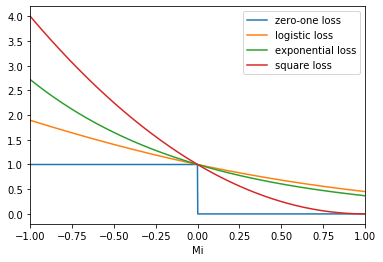

In [8]:
dots = np.linspace(-1, 1, 1000)
zero_one_loss = [loss_func(x) for x in dots]
log_losses = [log_loss(x) for x in dots]
exp_funces = [exp_func(x) for x in dots]
square_losses = [square_loss(x) for x in dots]

plt.xlabel('Mi')
plt.xlim(-1, 1)
plt.plot(dots, zero_one_loss)
plt.plot(dots, log_losses)
plt.plot(dots, exp_funces)
plt.plot(dots, square_losses)
plt.legend(['zero-one loss', 'logistic loss', 'exponential loss', 'square loss']);

### Logreg на примере

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1,
              0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [11]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [12]:
def custom_StandardScaler(x):
    return (x - x.mean())/x.std()

In [13]:
X_st = X.copy()
X_st[2] = custom_StandardScaler(X_st[2])

In [14]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [15]:
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

In [16]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [18]:
z = np.linspace(-10, 10, 100)

p = sigmoid(z)

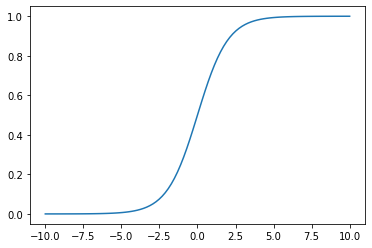

In [19]:
plt.plot(z, p);

In [20]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

In [21]:
W = logreg_eval_model(X_st, y, iterations=1000, alpha=1e-4)

итерация: 100, logloss: 1.5996538673708376, веса: [-1.76495316  0.08730161 -1.12929916 -0.64272316]
итерация: 200, logloss: 1.5767525572049883, веса: [-1.76108551  0.09900809 -1.1279574  -0.63405146]
итерация: 300, logloss: 1.554036925497323, веса: [-1.75724337  0.11066933 -1.12660468 -0.62541634]
итерация: 400, logloss: 1.5315150976159981, веса: [-1.75342735  0.12228271 -1.12524133 -0.61681915]
итерация: 500, logloss: 1.5091958490387767, веса: [-1.74963809  0.13384536 -1.12386772 -0.60826133]
итерация: 600, logloss: 1.4870886643594083, веса: [-1.74587627  0.14535416 -1.12248429 -0.59974443]
итерация: 700, logloss: 1.465203798107477, веса: [-1.7421426   0.15680564 -1.12109157 -0.59127007]
итерация: 800, logloss: 1.443552336114085, веса: [-1.73843781  0.16819602 -1.11969016 -0.58284002]
итерация: 900, logloss: 1.4221462556853233, веса: [-1.73476267  0.17952116 -1.11828074 -0.57445613]
итерация: 1000, logloss: 1.400998482285436, веса: [-1.731118    0.19077649 -1.11686409 -0.56612042]


### Домашнее задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [22]:
calc_logloss(y1, y_pred1)

0.10536051565782628

In [23]:
# I
def calc_logloss(y, y_pred):
    err = - np.mean(y*np.log(y_pred + 1e-10) + (1.0 - y)*np.log(1.0 - y_pred + 1e-10))
    return np.sum(err)

y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051554671516

In [25]:
# II
def calc_logloss(y, y_pred):
    y_pred = np.array(list(map(lambda x: 1e-10 if x == 0 else (1 - 1e-10) if x == 1 else x, y_pred)))
    err = - np.mean(y*np.log(y_pred) + (1.0 - y)*np.log(1.0 - y_pred))
    return np.sum(err)

y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])

calc_logloss(y1, y_pred1)

0.10536051565782628

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [44]:
def logreg_eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(2020)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha*(1/n * np.dot((y_pred - y), X.T))
        
        if i % (iterations/10) ==0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

W = logreg_eval_model(X_st, y, iterations=1000, alpha=1)

итерация: 100, logloss: 0.377356358914718, веса: [-3.75021186 -1.07861193  0.218501    3.91364619]
итерация: 200, logloss: 0.33778819286102435, веса: [-5.28738426 -1.06151216 -0.39526967  4.92331221]
итерация: 300, logloss: 0.3152375480300458, веса: [-6.45618202 -1.11539926 -0.81305324  5.75728522]
итерация: 400, logloss: 0.2996002720581165, веса: [-7.42049428 -1.17148873 -1.14240246  6.47527302]
итерация: 500, logloss: 0.2876200354353751, веса: [-8.25916253 -1.22646699 -1.42095009  7.11611703]
итерация: 600, logloss: 0.27782610197875923, веса: [-9.01404954 -1.27975079 -1.66680874  7.70290189]
итерация: 700, logloss: 0.26946571623249, веса: [-9.70929165 -1.3313056  -1.88998722  8.24968701]
итерация: 800, logloss: 0.2621151439525438, веса: [-10.35972425  -1.38123331  -2.09647372   8.76544815]
итерация: 900, logloss: 0.25551747588549983, веса: [-10.97495109  -1.4296597   -2.29007171   9.25616875]
итерация: 1000, logloss: 0.24950733333295277, веса: [-11.56146493  -1.47670244  -2.4733166  

3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [45]:
def calc_pred_proba(W, X):
    return sigmoid(np.dot(W,X))

In [46]:
y_prob = calc_pred_proba(W, X_st); y_prob

array([0.2912464 , 0.12903933, 0.9977279 , 0.19790992, 0.73838271,
       0.28032547, 0.99947686, 0.08480891, 0.34653549, 0.99191478])

In [47]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [48]:
def calc_pred(W, X, threshold=0.5):
    p = calc_pred_proba(W, X)
    out = (p > threshold).astype(int)
    return out

In [49]:
y_pred = calc_pred(W, X_st, threshold=0.5); y_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [50]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [51]:
def calc_conf_matrix(y_pred, y):
    conf_matrix = np.array([[0]*(len(set(y))) for i in range(len(set(y)))])
    for pred, exp in zip(y_pred, y):
        conf_matrix[int(pred)][int(exp)] += 1
    return conf_matrix

In [52]:
conf = calc_conf_matrix(y_pred, y); conf

array([[5, 1],
       [0, 4]])

In [53]:
def pres_recall(conf_matrix):
    recall = conf_matrix[0][0]/np.sum(conf_matrix[:, 0])
    pres = conf_matrix[0][0]/np.sum(conf_matrix[0, :])
    return recall, pres

In [54]:
recall, pres = pres_recall(conf); recall, pres

(1.0, 0.8333333333333334)

In [55]:
def calc_acc(y_pred, y):
    return np.sum([y_pred[i] == y[i] for i in range(len(y))])/len(y)

In [56]:
calc_acc(y_pred, y)

0.9

6. Могла ли модель переобучиться? Почему?  

На небольших наборах данных модель почти всегда переобучается.  
При откровенном переобучении у нас не было бы ошибок вообще:

In [57]:
W

array([-11.56146493,  -1.47670244,  -2.4733166 ,   9.72599362])

7*. Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.